In [1]:
from hierarchy import *
set_publication_figure_defaults()
fig_num = 4

clusters = Clusters()
clusters.summarize()

NR <= 200:
Anaesthetised: ic: 178, mgb:  84, mgbm:   0, ac: 298, total:  560
Awake:         ic: 262, mgb: 278, mgbm:   0, ac: 341, total:  881
Total:         ic: 440, mgb: 362, mgbm:   0, ac: 639, total: 1441

NR > 200:
Anaesthetised: ic:   7, mgb:  27, mgbm:   0, ac:  55, total:   89
Awake:         ic:   1, mgb:  29, mgbm:   0, ac:   1, total:   31
Total:         ic:   8, mgb:  56, mgbm:   0, ac:  56, total:  120



In [2]:
clusters.load_analyses(['coch_kernel_main', 'coch_kernel_sigmoid_main',
#                         'coch_kernel_nrf_main',
                        'a2a_kernels_main', 'a2a_kernels_sigmoid_main',
                        'm2a_kernels_ic_main', 'm2a_kernels_all_areas_main'])

Loading "coch kernels; 16 folds; ElNet"
Fieldname: coch_kernel_main
Found single data file with 1561 clusters
All results present (1561 clusters)

Loading "coch kernels; 16 folds; ElNet; LN (sigmoid)"
Fieldname: coch_kernel_sigmoid_main
Found single data file with 1561 clusters
All results present (1561 clusters)

Loading "main elnet a2a kernels (NR=200; all units; all valid data; 1 fold)"
Fieldname: a2a_kernels_main
/Users/ben/projects/michael-data/hierarchy/results/stim-12/a2a_kernels--state=anaesthetised-awake--subset=valid20-all--combo_lens=1-2-3--n_h=8--n_fut=5--k_folds=16--fold_idxes_to_include=15--noiseratio=200--regress=ElNet
Found data files with 1441 clusters
All results present (1441 clusters)

Loading "a2a kernels; 1 fold; ElNet; LN (sigmoid)"
Fieldname: a2a_kernels_sigmoid_main
Found single data file with 1441 clusters
** Missing more than 15 results **

Loading "main m2a IC kernels"
Fieldname: m2a_kernels_ic_main
/Users/ben/projects/michael-data/hierarchy/results/stim-12/

In [3]:
# compare linear-linear m2a kernels with linear a2a kernels

def coch_kernel_main_linear_cc_norm_test(cluster, regressor_area=None):
    return cluster['coch_kernel_main']['coch_kernel'][-1]['cc_norm_test'][0]

def m2a_kernel_ic_main_linear_cc_norm_test(cluster, regressor_area='ic'):
    try:
        return cluster['m2a_kernels_ic_main'][regressor_area]['linear'][-1]['cc_norm_test'][0]
    except:
        return np.inf
    
# compare ln-ln m2a kernels with ln cochleagram kernels

def coch_kernel_main_sigmoid_cc_norm_test(cluster, regressor_area=None):
    return cluster['coch_kernel_sigmoid_main']['sigmoid_fits'][-1]['sigmoid']['cc_norm_test'][0]

def coch_kernel_main_nrf_cc_norm_test(cluster, regressor_area=None):
    return cluster['coch_kernel_nrf_main']['coch_kernel'][-1]['cc_norm_test'][0]

def m2a_kernel_ic_main_sigmoid_cc_norm_test(cluster, regressor_area='ic'):
    try:
        return cluster['m2a_kernels_ic_main'][regressor_area]['sigmoid'][-1]['sigmoid_cc_norm_test'][0]
    except:
        return np.inf

def m2a_kernel_all_areas_main_sigmoid_cc_norm_test(cluster, regressor_area='ic_mgb_ac'):
    try:
        return cluster['m2a_kernels_all_areas_main'][regressor_area]['sigmoid'][-1]['sigmoid_cc_norm_test'][0]
    except:
        return np.inf

In [4]:
clusters.clusters[0]['a2a_kernels_sigmoid_main']['sigmoid_fits']['ic'][-1]['sigmoid']['cc_norm_test']

(0.7338338639027355, 0.5899541830333868, 0.8039342582200334)

In [5]:
def a2a_kernel_ic_main_sigmoid_cc_norm_test(cluster, regressor_area='ic'):
    try:
        return cluster['a2a_kernels_sigmoid_main']['sigmoid_fits']['ic'][-1]['sigmoid']['cc_norm_test'][0]
    except:
        return np.inf

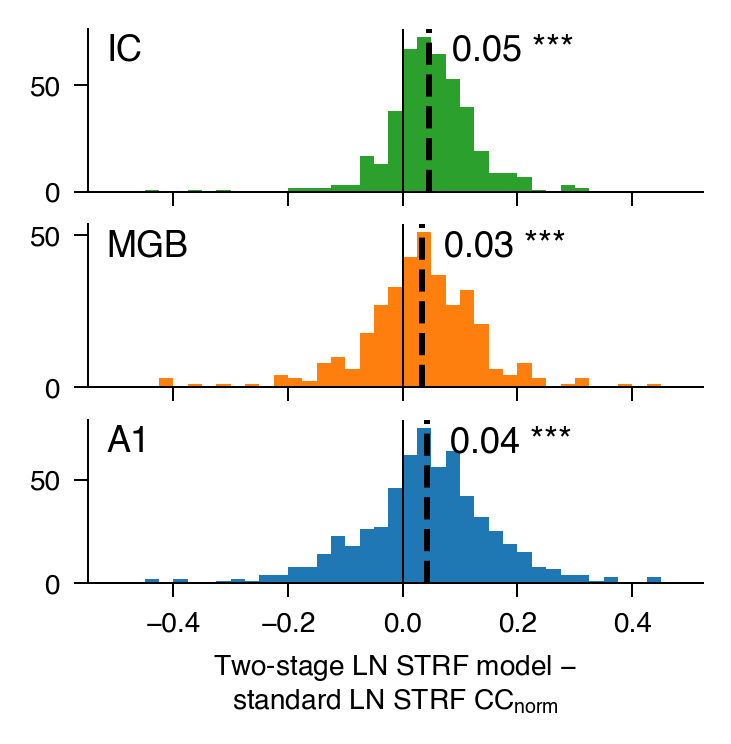

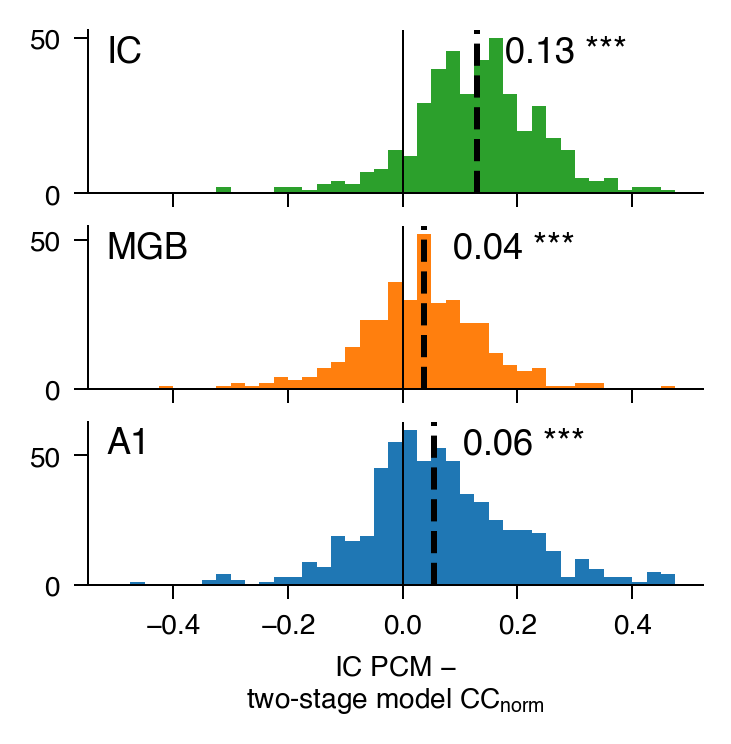

In [6]:
wid = 7/2.54
hgt = 2.5

fig = plt.figure(figsize=(wid, hgt))
hist_by_brain_area(clusters,
         brain_areas=['ic', 'mgb', 'ac'],
         select_params={'noiseratio': 200},
         val_func=lambda c: m2a_kernel_ic_main_sigmoid_cc_norm_test(c) - coch_kernel_main_sigmoid_cc_norm_test(c),
         bins=np.arange(-.5,.5,.025),
         x_label='Two-stage LN STRF model $-$\nstandard LN STRF $CC_{norm}$',
         central_tendency_alignment='left',
         central_tendency_margin=.04)

plt.savefig('figure-%d-sigmoid-vs-sigmoid-hist.pdf' % fig_num)

fig = plt.figure(figsize=(wid, hgt))
hist_by_brain_area(clusters,
         brain_areas=['ic', 'mgb', 'ac'],
         select_params={'noiseratio': 200},
         val_func=lambda c: a2a_kernel_ic_main_sigmoid_cc_norm_test(c) - m2a_kernel_ic_main_sigmoid_cc_norm_test(c),
         bins=np.arange(-.5,.5,.025),
         x_label='IC PCM $-$\ntwo-stage model $CC_{norm}$',
         central_tendency_alignment='left',
         central_tendency_margin=.05)

plt.savefig('figure-%d-a2a-vs-m2a-hist.pdf' % fig_num)